In [5]:
import tensorflow.compat.v1 as tf # Compatability
tf.disable_v2_behavior() # Watch low-level flow

In [3]:
import numpy as np
import pandas as pd

In [12]:
a = tf.add(3, 5) # Pended status [Building only]
a

<tf.Tensor 'Add_6:0' shape=() dtype=int32>

In [13]:
sess = tf.Session()
sess.run(a)

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-06-28 09:23:47.716600: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-28 09:23:47.716745: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-06-28 09:23:47.720007: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-28 09:23:47.720153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8

In [16]:
sess.close()

In [19]:
x = 2
y = 3

op1 = tf.add(x, y)
op2 = tf.multiply(x, y)
useless = tf.multiply(x, op1) # Ignore
op3 = tf.pow(op2, op1)

In [20]:
with tf.Session() as sess:
    op3 = sess.run(op3)
    print(op3)

7776


2022-06-28 09:34:45.478507: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-28 09:34:45.478535: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-06-28 09:34:45.480812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


# Linear regression

In [21]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [23]:
x_data = datasets.load_boston().data[:, 12] # 이웃 중 하위계층의 비율
y_data = datasets.load_boston().target

/opt/homebrew/Caskroom/miniforge/base/envs/main/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include 

In [28]:
pd.Series(x_data)

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Length: 506, dtype: float64

In [25]:
df = pd.DataFrame([x_data, y_data]).transpose()
df

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
...,...,...
501,9.67,22.4
502,9.08,20.6
503,5.64,23.9
504,6.48,22.0


In [29]:
pd.Series(y_data)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [26]:
df_tmp = pd.DataFrame([x_data, y_data])
df_tmp

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
0,4.98,9.14,4.03,2.94,5.33,5.21,12.43,19.15,29.93,17.1,...,21.14,14.1,12.92,15.1,14.33,9.67,9.08,5.64,6.48,7.88
1,24.00,21.60,34.70,33.40,36.20,28.70,22.90,27.10,16.50,18.9,...,19.70,18.3,21.20,17.5,16.80,22.40,20.60,23.90,22.00,11.90


In [30]:
w = tf.Variable(tf.random_normal([1])) # Normal distribution (정규분포)
b = tf.Variable(tf.random_normal([1]))

In [34]:
y_pred = w * x_data + b
y_pred

<tf.Tensor 'add_11:0' shape=(506,) dtype=float32>

In [35]:
loss = tf.reduce_mean(tf.square(y_pred - y_data)) 
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)
train

<tf.Operation 'GradientDescent_1' type=NoOp>

## Train the model

In [58]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # tf.Variable 초기화

    for step in range(10000):
        sess.run(train)
        if step % 1000 == 0:
            print(f'Step={step}: w={sess.run(w)} b={sess.run(b)}')
            print(f'loss={sess.run(loss)}\n')
    
    # w_out = sess.run(w)
    # b_out = sess.run(b)
    w_out, b_out = sess.run([w, b])

2022-06-28 10:42:41.255915: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-28 10:42:41.255935: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-06-28 10:42:41.259692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-28 10:42:41.269942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-28 10:42:41.287387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-28 10:42:41.28

Step=0: w=[0.25540978] b=[-0.6374829]
loss=509.9853515625

Step=1000: w=[0.3542415] b=[12.829137]
loss=152.3258514404297

Step=2000: w=[-0.14362758] b=[21.12181]
loss=82.0022201538086

Step=3000: w=[-0.45145062] b=[26.249014]
loss=55.11936569213867

Step=4000: w=[-0.6417734] b=[29.419094]
loss=44.8426628112793

Step=5000: w=[-0.7594464] b=[31.379093]
loss=40.914146423339844

Step=6000: w=[-0.8322031] b=[32.590954]
loss=39.41233825683594

Step=7000: w=[-0.87718683] b=[33.340218]
loss=38.83824157714844

Step=8000: w=[-0.9049995] b=[33.80348]
loss=38.618778228759766

Step=9000: w=[-0.9221957] b=[34.0899]
loss=38.534889221191406



2022-06-28 10:42:51.207179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


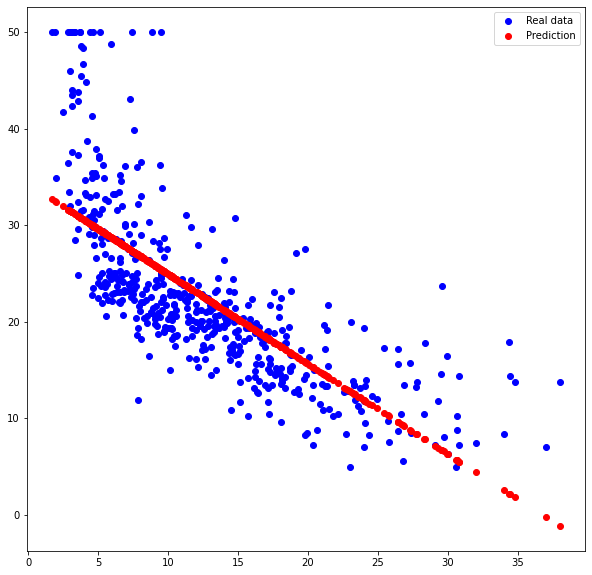

In [44]:
plt.figure(figsize=(10, 10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, x_data * w_out + b_out, 'ro', label='Prediction')
plt.legend()
plt.show()

In [83]:
_x_data = tf.reshape(x_data, [len(x_data), 1]) # (506, ) -> (506, 1)
_y_data = tf.reshape(y_data, [len(y_data), 1])

W1 = tf.Variable(tf.random_normal([1, 5], dtype=tf.float64))
W2 = tf.Variable(tf.random_normal([5, 10], dtype=tf.float64))
W_out = tf.Variable(tf.random_normal([10, 1], dtype=tf.float64))

hidden1 = tf.nn.elu(tf.matmul(_x_data, W1))
hidden2 = tf.nn.elu(tf.matmul(hidden1, W2))
output = tf.matmul(hidden2, W_out)

In [67]:
x_data.shape

(506,)

In [47]:
_x_data

<tf.Tensor 'Reshape_1:0' shape=(506, 1) dtype=float64>

In [52]:
W

<tf.Variable 'Variable_6:0' shape=(1, 5) dtype=float64_ref>

In [53]:
W_out

<tf.Variable 'Variable_7:0' shape=(5, 1) dtype=float64_ref>

In [54]:
hidden

<tf.Tensor 'Sigmoid_2:0' shape=(506, 5) dtype=float64>

In [55]:
output

<tf.Tensor 'MatMul_5:0' shape=(506, 1) dtype=float64>

In [85]:
# loss = tf.reduce_mean(tf.square((output - y_data))) 
loss = tf.losses.mean_squared_error(output, _y_data)
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)
train

<tf.Operation 'Adam_4' type=NoOp>

In [86]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # tf.Variable 초기화
    epoch = 50000

    for step in range(epoch):
        sess.run(train)
        if step % 5000 == 0:
            print(f'Step={step}, Loss={sess.run(loss)}\n')

    output = sess.run(output)

2022-06-28 11:26:01.489274: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-28 11:26:01.489310: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-06-28 11:26:01.512655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-28 11:26:01.564012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-28 11:26:01.616142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Step=0, Loss=711.0012817382812

Step=5000, Loss=27.136371612548828

Step=10000, Loss=26.185352325439453

Step=15000, Loss=26.160520553588867

Step=20000, Loss=26.149560928344727

Step=25000, Loss=26.15397834777832

Step=30000, Loss=26.139429092407227

Step=35000, Loss=26.137218475341797

Step=40000, Loss=26.13519287109375

Step=45000, Loss=26.132577896118164



2022-06-28 11:26:57.279072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


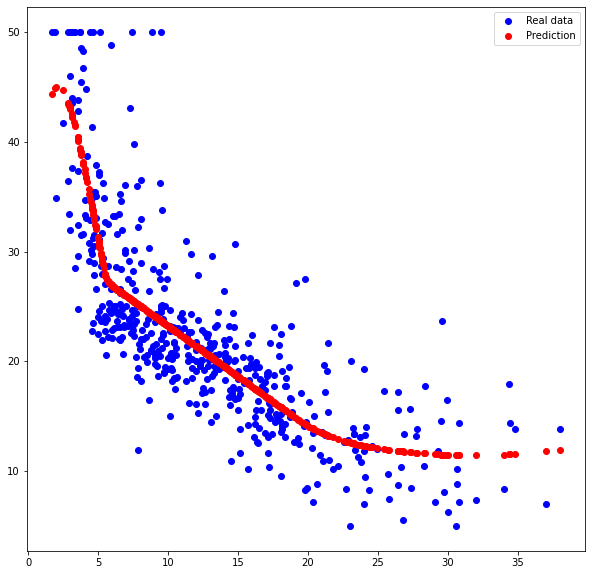

In [87]:
plt.figure(figsize=(10, 10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()